# Word Count Experiment

#### Python Program to count the frequency of words in a document. It takes two files as input. First file contains list words to be counted. Second file contains another set of words which needs to be excluded from the count. These words can also be numbers.

Enter filename with words: c:\BIGDATA\wordsinput.txt
Enter exclude filename with words: c:\BIGDATA\wordsexclude.txt
   Word  Count   Count %
0    of  42193  4.889969
1    to  25344  2.937250
2    in  24959  2.892630
3     a  20113  2.331002
4    is  13936  1.615116
5   for  10307  1.194533
6    as   8801  1.019994
7  with   7363  0.853337
8    on   6762  0.783684
9   are   6679  0.774064


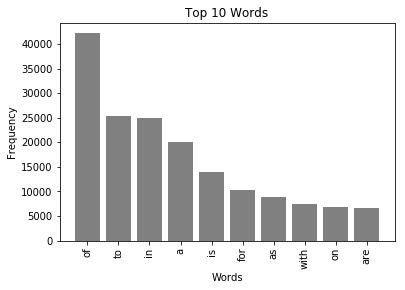

In [3]:
import string
import matplotlib.pylab as plt
import operator
import tkinter
import pandas as pd
from pylab import MaxNLocator

#build hashmap with words from input file
def buildHashmap(tokens):
    hash_map = {}
    if tokens is not None:
        for element in tokens:
            # convert to lower case ; remove ',' or '.' if any in input txt
            word = element.replace(",","").replace(".","").lower()
            # if already word exists then increment counter else add new entry into the map
            if word in hash_map:
                hash_map[word] = hash_map[word] + 1
            else:
                hash_map[word] = 1

        return hash_map
    else:
        return None
#function to delete from hashmap        
def delete(map,key):
  try:
     del map[key]
  except KeyError:
     pass

#function to get % column
def get_column(array, col,total):
  result = []
  for row in array:
    result.append((row[col]/total)*100)
  return result
                            
def main():
  try:
   #read input file with words
   fileName = input("Enter filename with words: ")
   inputFile = open(fileName,"r",encoding='ascii')
   words = inputFile.read().strip().split()

   #read file with excluded words
   excludeFileName = input("Enter exclude filename with words: ")
   excludeFile = open(excludeFileName,"r")
   excludeWords = excludeFile.read().strip().split()
   
   #build hashmap with input word list
   wordsMap = buildHashmap(words)
   
   #delete excluded words from hashmap
   for key in excludeWords:
     delete(wordsMap,key.lower())
   
   #get top 10 list
   top10 = sorted(wordsMap.items(), key=operator.itemgetter(1), reverse=True)[:10]
      
   #prepare output table with Word and Count column
   df = pd.DataFrame(top10,columns=['Word','Count'])

   #find total count which is required to calculate %
   total = 0;
   c3 = []
   for key in wordsMap:
	   total = total+wordsMap[key]
  
   #create % column
   c3 = get_column(top10, 1,total)
  
   #add % column to existing table
   df['Count %'] = c3
   
   #print final result as a table
   print(df)
   
   #draw bar chart   
   ax = plt.figure().gca() #to show wholenumbers on the y-axis
   ax.yaxis.set_major_locator(MaxNLocator(integer=True))
   plt.bar(range(len(top10)), [val[1] for val in top10], align='center',color='gray')
   plt.xticks(range(len(top10)), [val[0] for val in top10])
   plt.xticks(rotation=90)
   plt.xlabel('Words')
   plt.ylabel('Frequency')
   plt.title('Top 10 Words')
   
   plt.show()
  
  finally:
    inputFile.close()
    excludeFile.close()
    
#begin of the program
main()